In [4]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

import fna

import pipeline as pipeline

sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

In [14]:
tau = 10.

from fna.tools.signals import make_simple_kernel, pad_array
kernel = make_simple_kernel('exp', tau=tau, width=100., height=1./tau, resolution=1.)

def smoothedspikes(spikes):
    tau = 10
    #spikes = spikes.time_slice(0, l)

    kernel = make_simple_kernel('exp', tau=tau, width=100., height=1./tau, resolution=1.)
    axis_, rates = spikes.averaged_instantaneous_rate(resolution=1., kernel=kernel, norm=1000)
    
    return axis_, rates

In [36]:
! ls ../demyelination/data/overhaul/activity/

'spk_overhaul_T=0.0'   'spk_overhaul_T=4.0'  'spk_overhaul_T=7.0'
'spk_overhaul_T=1.0'   'spk_overhaul_T=5.0'  'spk_overhaul_T=8.0'
'spk_overhaul_T=10.0'  'spk_overhaul_T=6.0'  'spk_overhaul_T=9.0'


## Baseline Model with all Connections

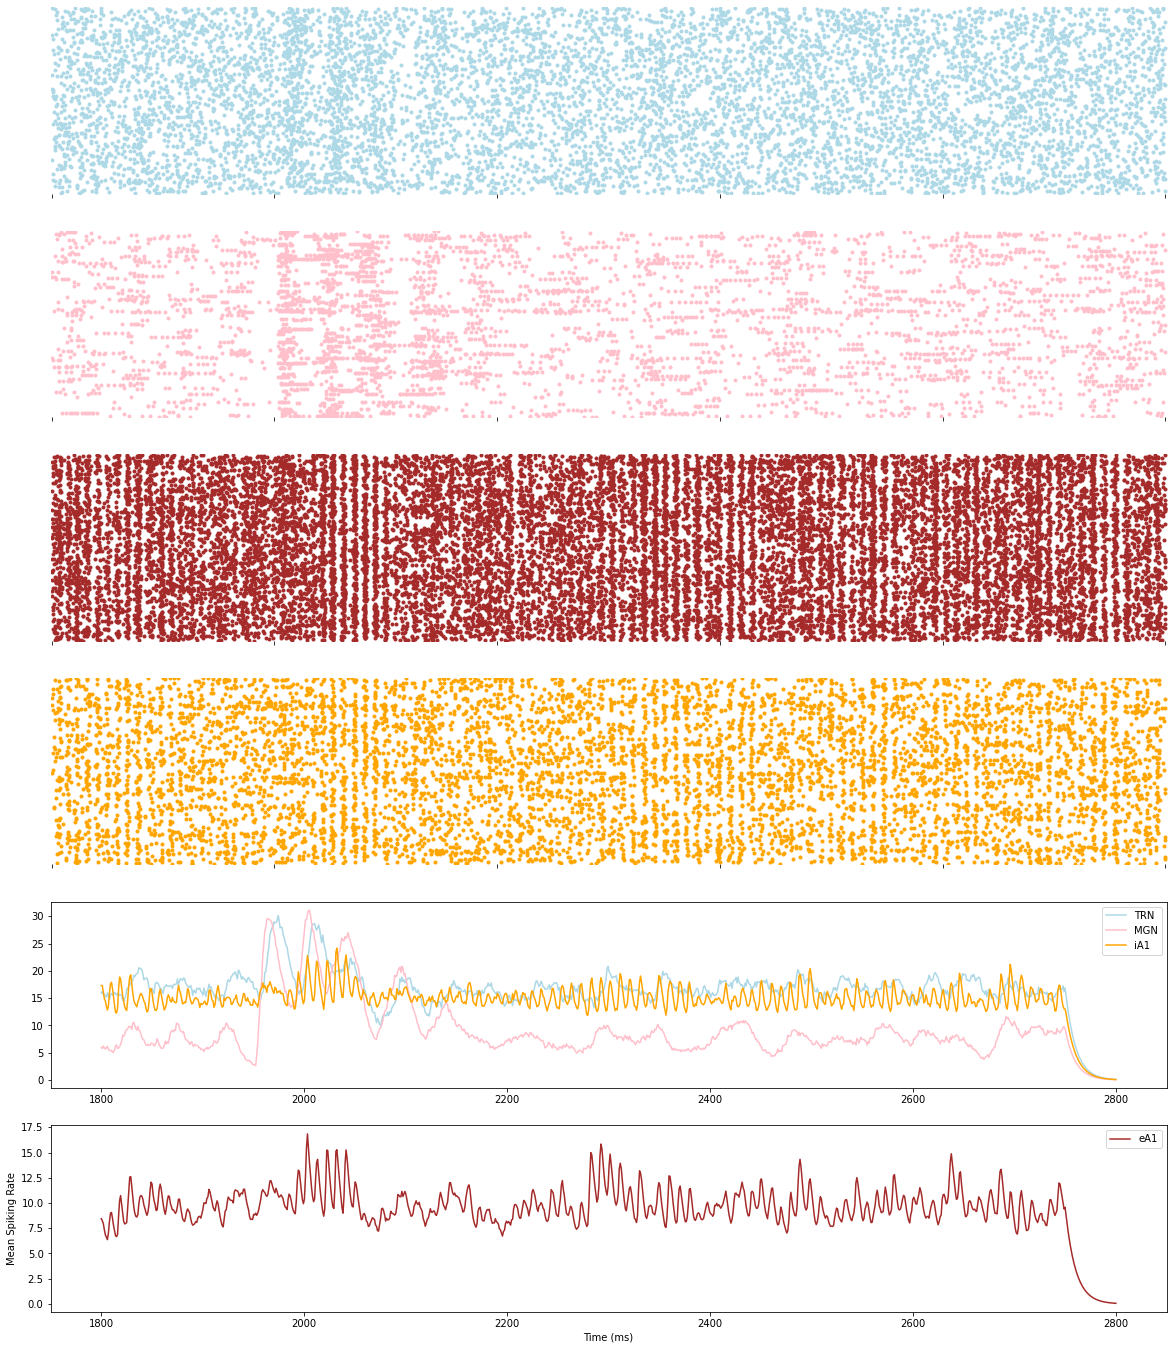

In [40]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=0.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

# print("MEAN SPIKING RATE: ", p.spikeobj['MGN'].time_slice(300, 500).mean_rate(), \
#       p.spikeobj['MGN'].time_slice(500, 600).mean_rate(),\
#       p.spikeobj['MGN'].time_slice(1000, 2000).mean_rate())
# print("MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(300, 500).mean_rate(), \
#       p.spikeobj['eA1'].time_slice(500, 600).mean_rate(),\
#       p.spikeobj['eA1'].time_slice(1000, 2000).mean_rate())
# print("PEARSON COEFF: ", p.spikeobj['eA1'].time_slice(300, 500).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
#       p.spikeobj['eA1'].time_slice(500, 600).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0],\
#       p.spikeobj['eA1'].time_slice(1000, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0])
# print("PEARSON COEFF: ", p.spikeobj['MGN'].time_slice(300, 500).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
#       p.spikeobj['MGN'].time_slice(500, 600).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0],\
#       p.spikeobj['MGN'].time_slice(1000, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0])
# print("CV_ISI: ", p.spikeobj['MGN'].time_slice(2000, 3000).cv_isi().mean(), p.spikeobj['TRN'].time_slice(2000, 3000).cv_isi().mean())
# print("PEARSON COEFF: ", p.metrics['pearsoncoeff']['MGN'], p.metrics['pearsoncoeff']['TRN'])
#np.mean(p.spikeobj['MGN'].averaged_instantaneous_rate(resolution=1., kernel=kernel, norm=1000))

# plt.title("Stimulation of the MGN at 4.67Hz with a weight of 15 from 500ms to 600ms. \
# Mean Firing Rate of eA1 Before Stim: 8.5Hz, During: 19.3Hz, After: 8.1Hz\
# Pearson Pairwise Coeff of eA1 Before Stim: 0.02, During: 0.02, After: 0.0007")

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/mgnstim-stimscale=15.pdf")

## A Model with only Background Activity

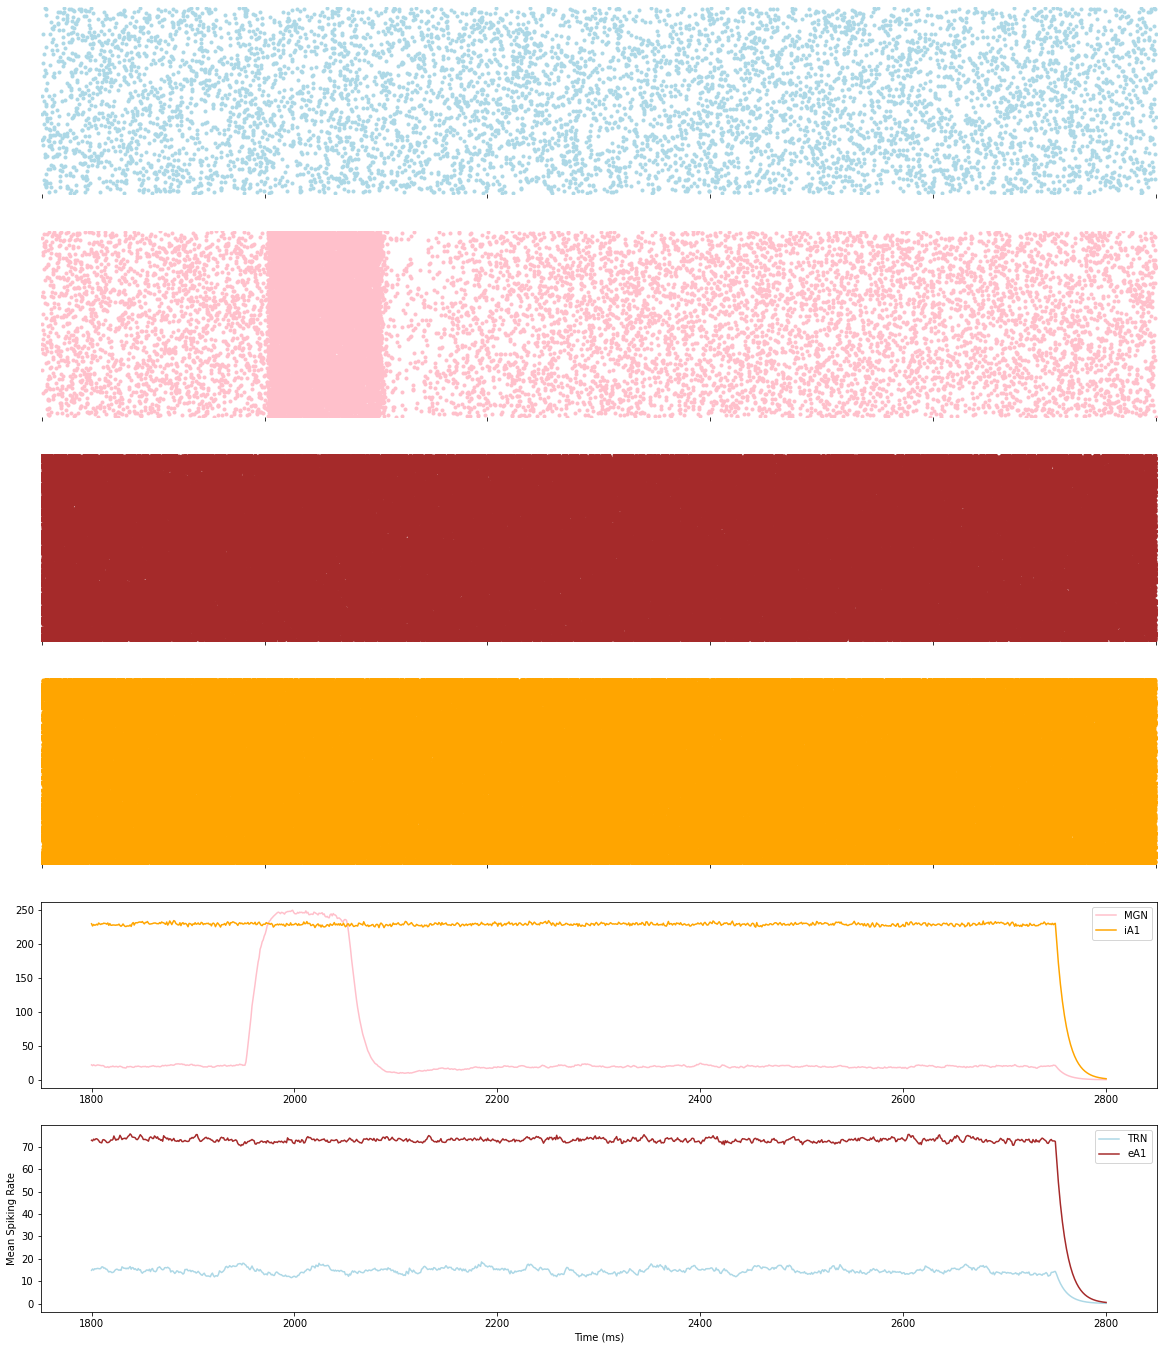

In [39]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=1.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with only connections from the eA1 to the iA1

Lead to numeric instability. Generally caused by v high activity.

### A Model with only Intra Cortical Connections

MEAN SPIKING RATE:  19.02 18.7 19.154
MEAN SPIKING RATE:  8.0 8.55 8.3275
PEARSON COEFF:  -0.0005491593206580969 0.009765032873467794 -0.002130807374185031
PEARSON COEFF:  0.011261695118915192 0.014388301522527208 0.006566943235288397


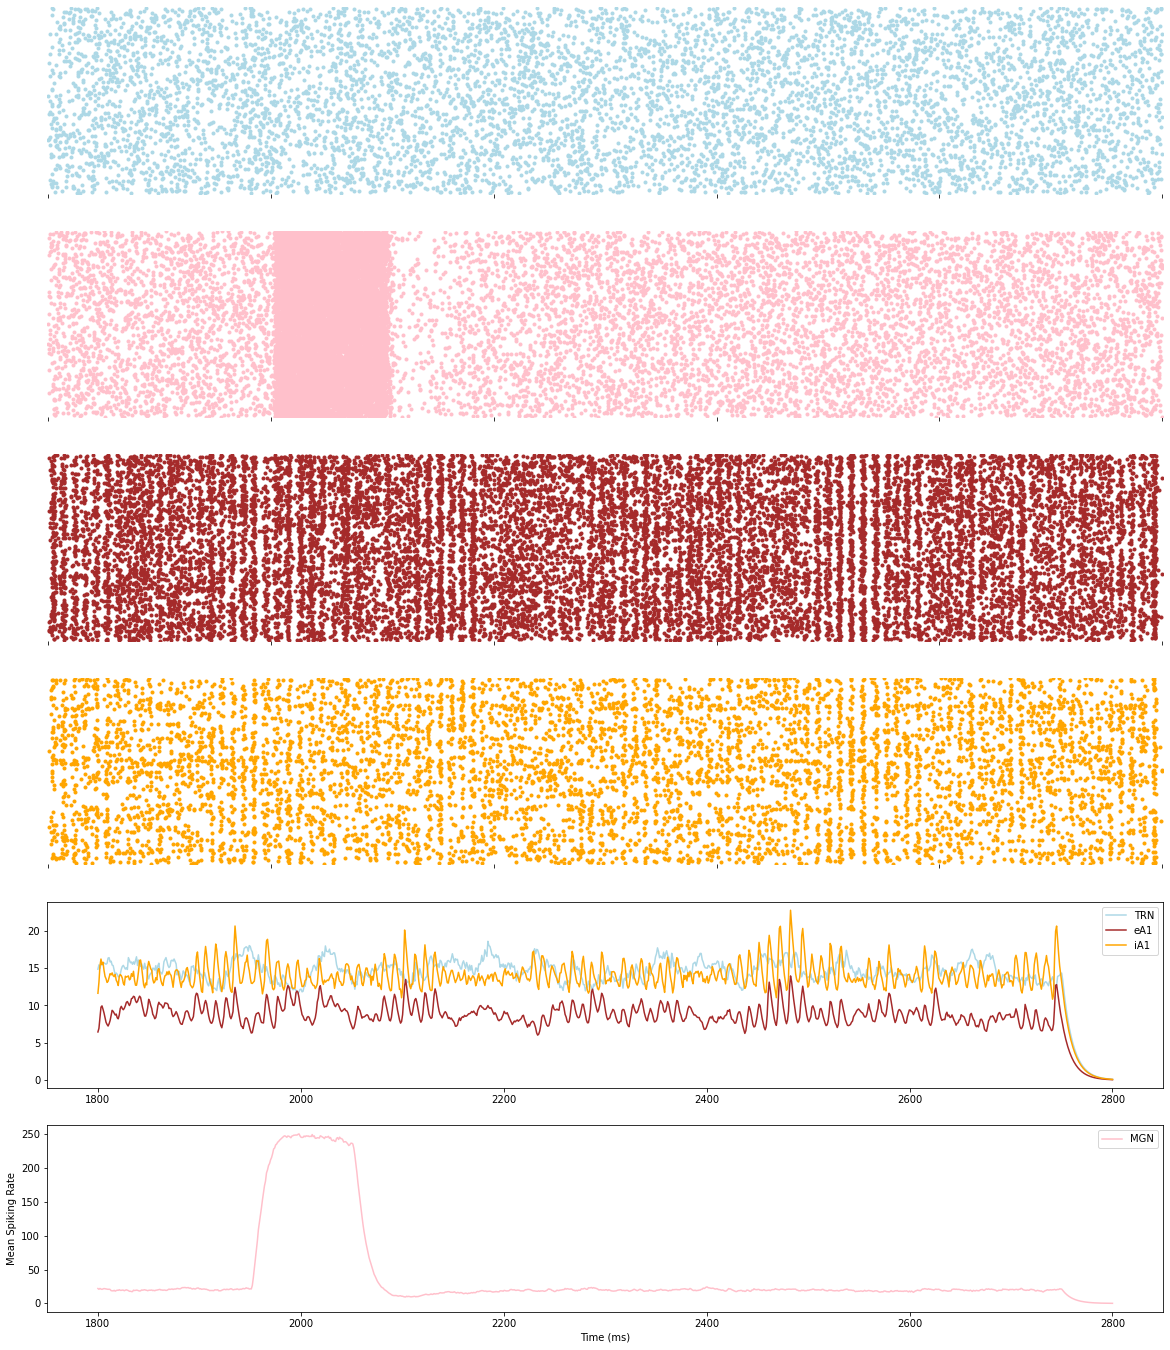

In [22]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=4.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with only Connection from the MGN to the TRN

MEAN SPIKING RATE:  22.82 21.96 22.392
MEAN SPIKING RATE:  69.835 69.455 69.5125
PEARSON COEFF:  0.014790682675899338 nan -0.0021424299502912436
PEARSON COEFF:  0.010172829011849483 -0.012036186077687666 0.0008559386857852042


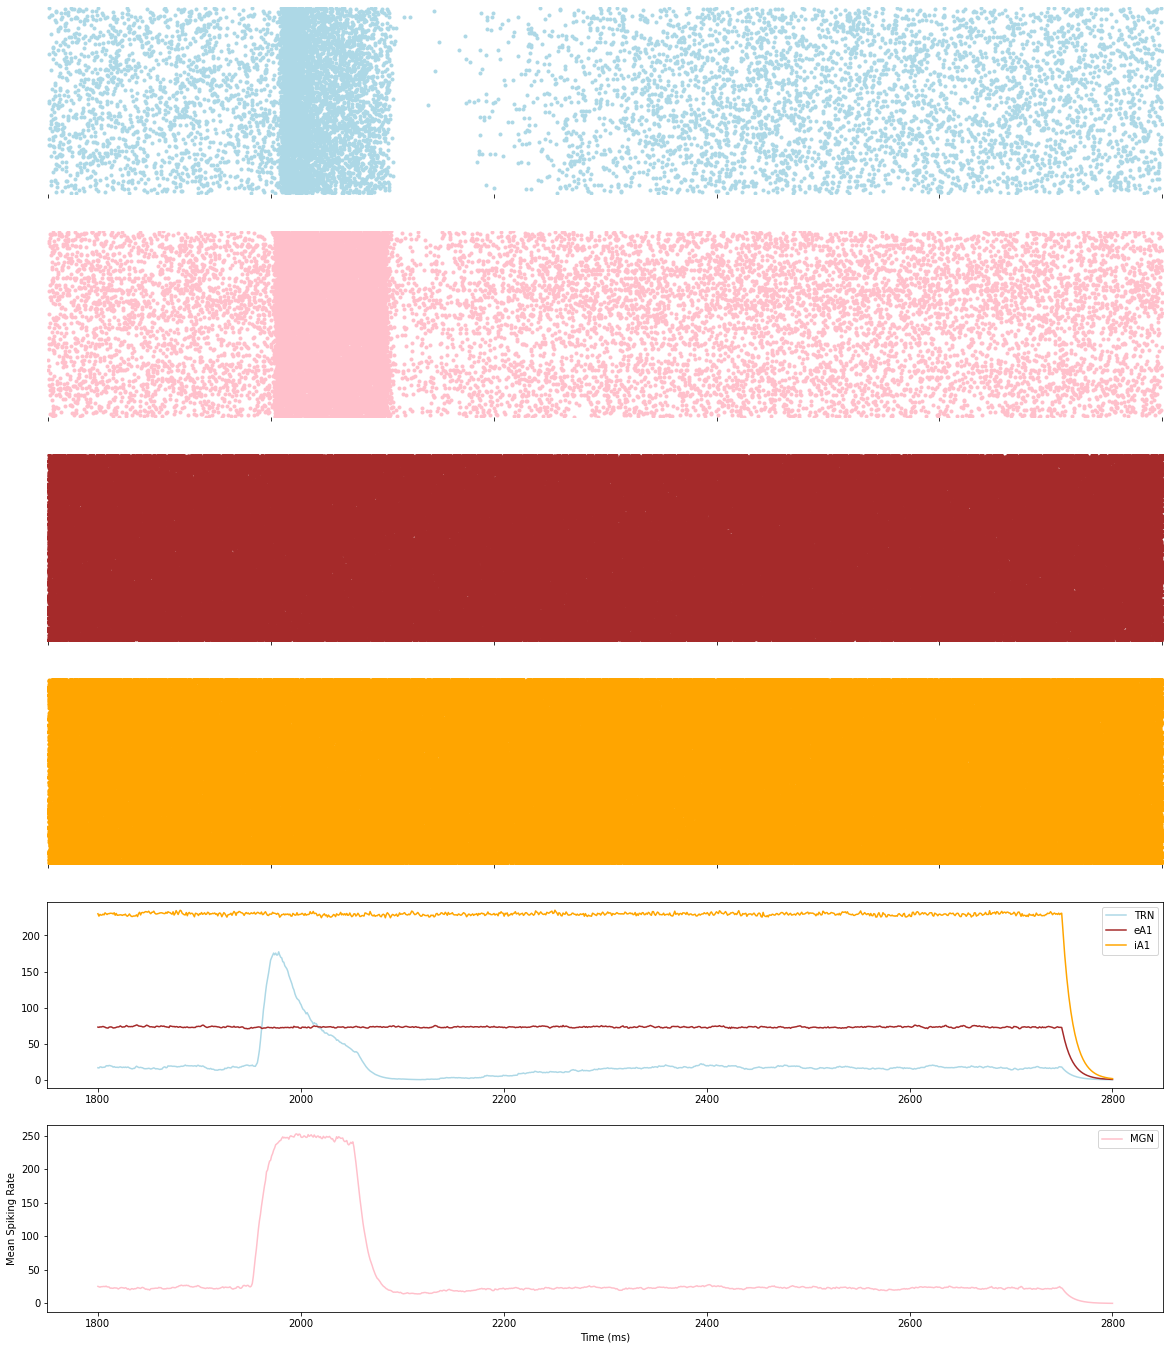

In [25]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=5.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with only Intra Thalamic Connections

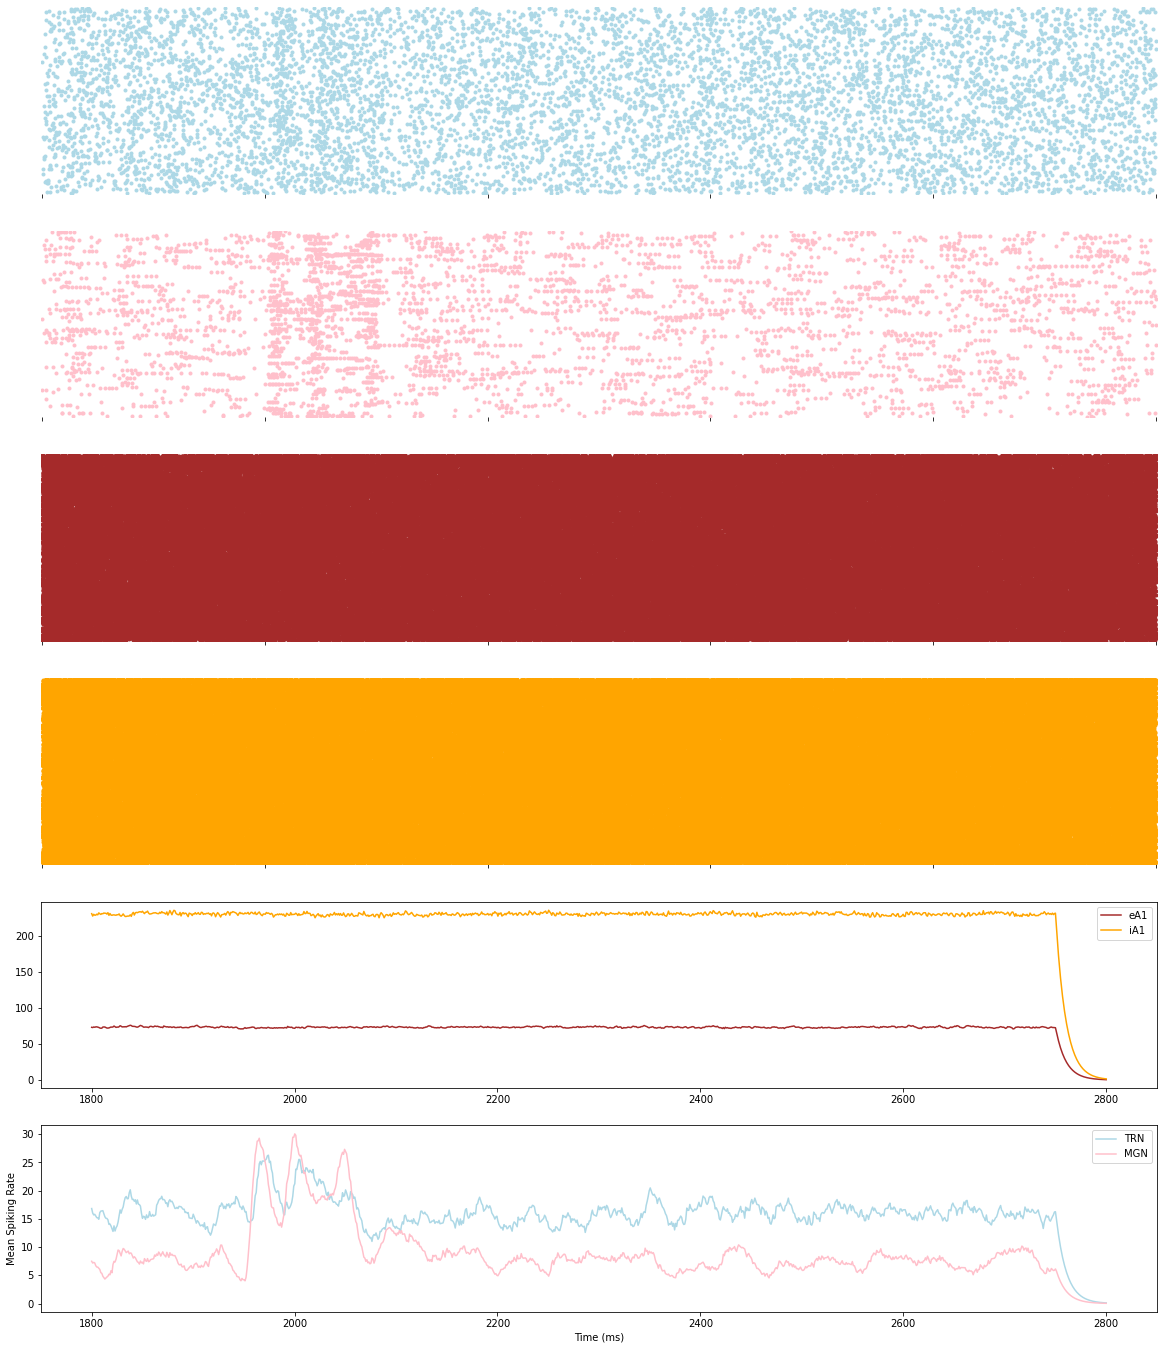

In [42]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=6.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with Connection from the CTX to the MGN only

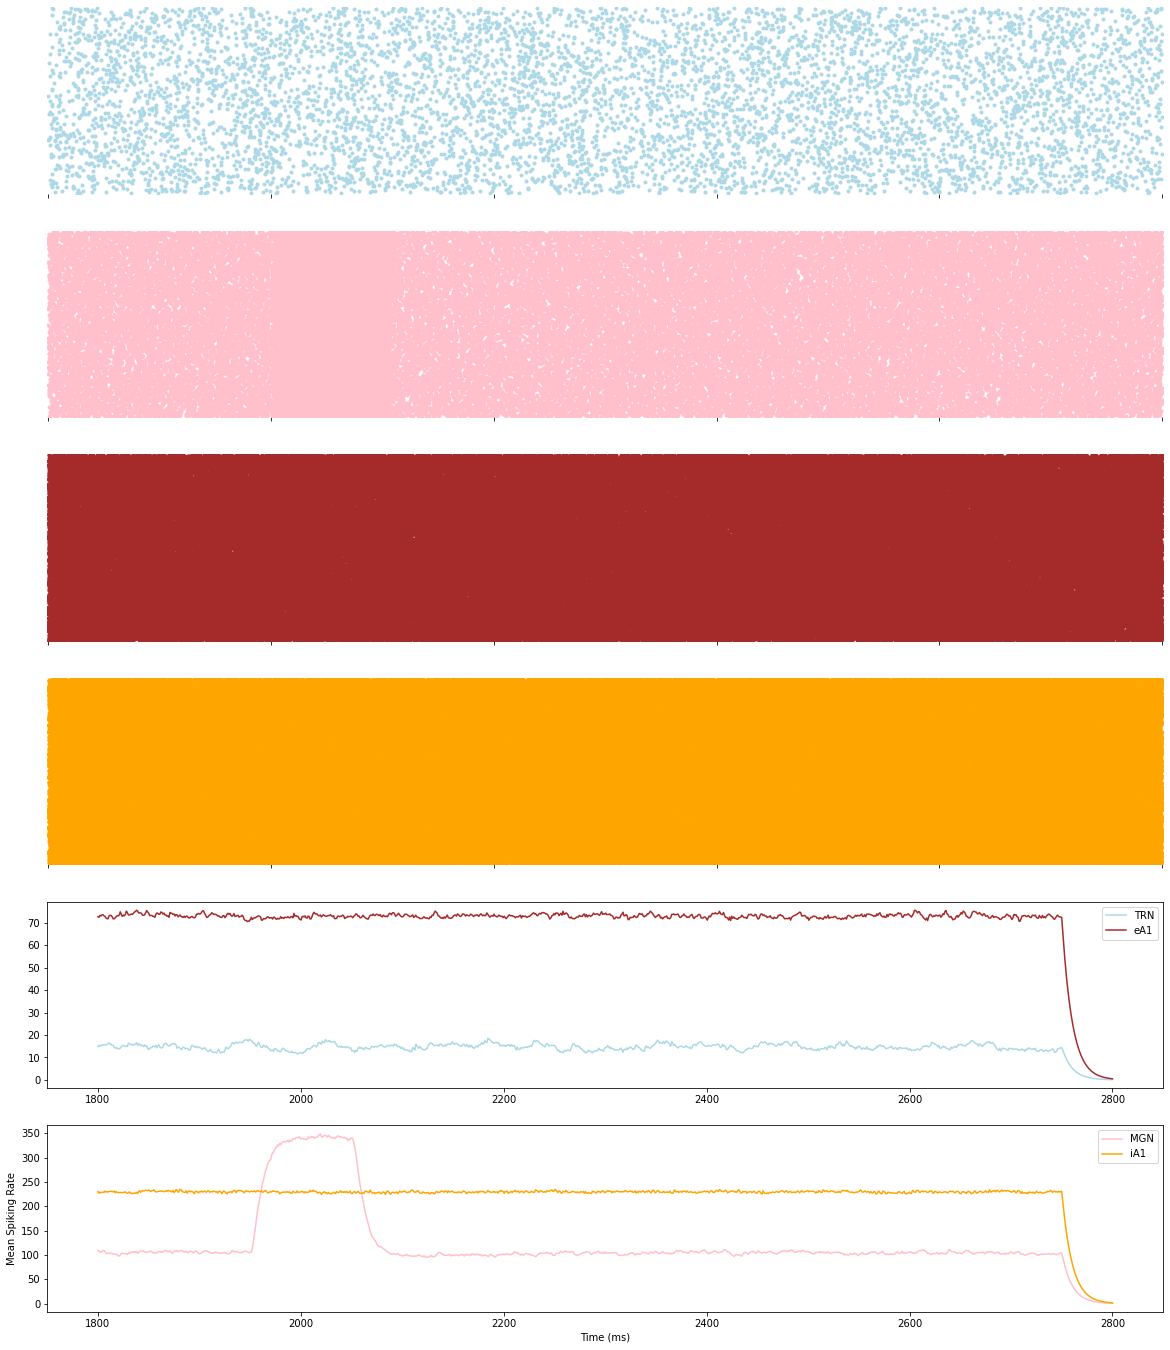

In [30]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=7.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with Connection from the CTX to the TRN only

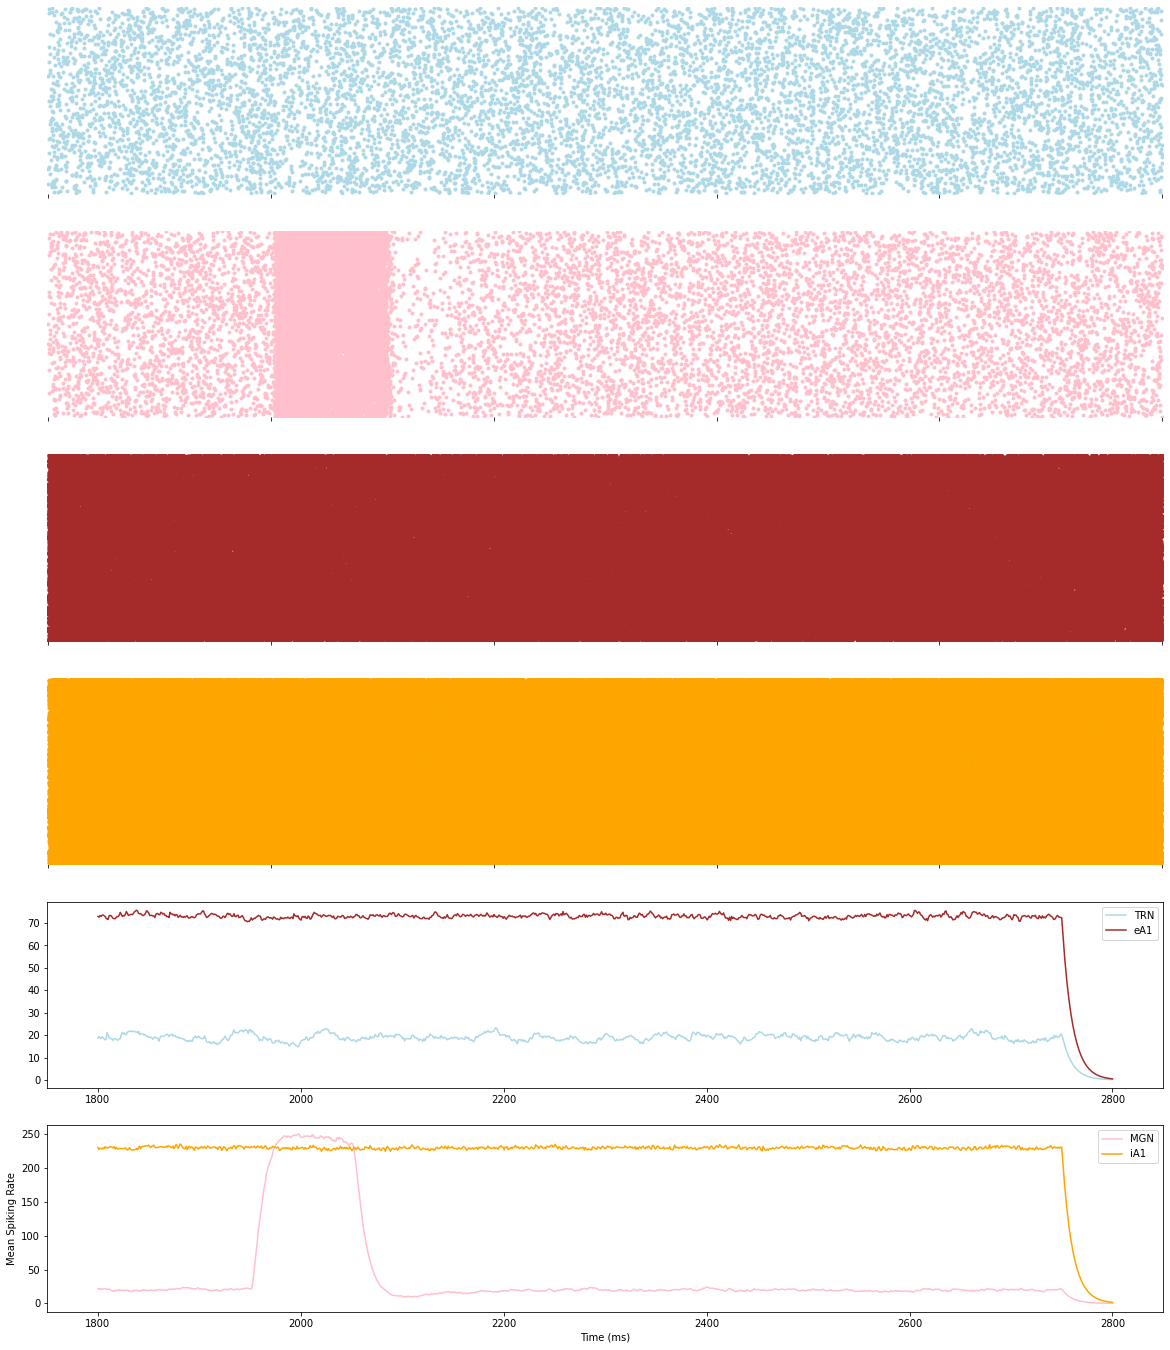

In [33]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=8.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with Connections from the CTX to the THL only

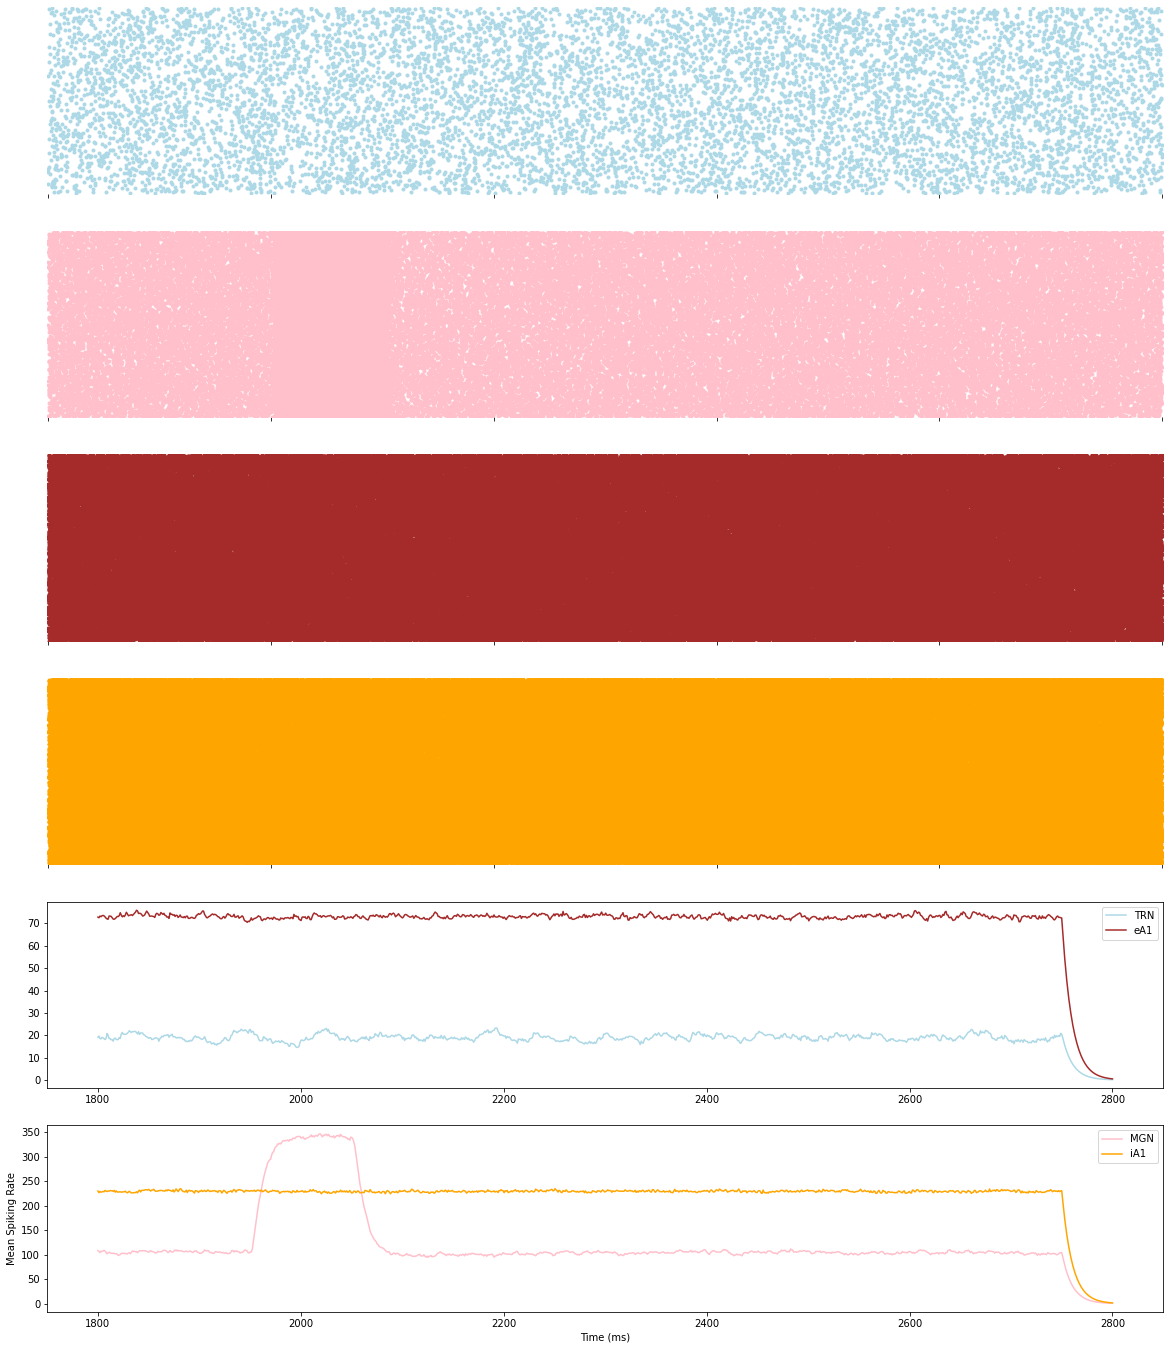

In [34]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=9.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

### A Model with Connection from the THL to the CTX only

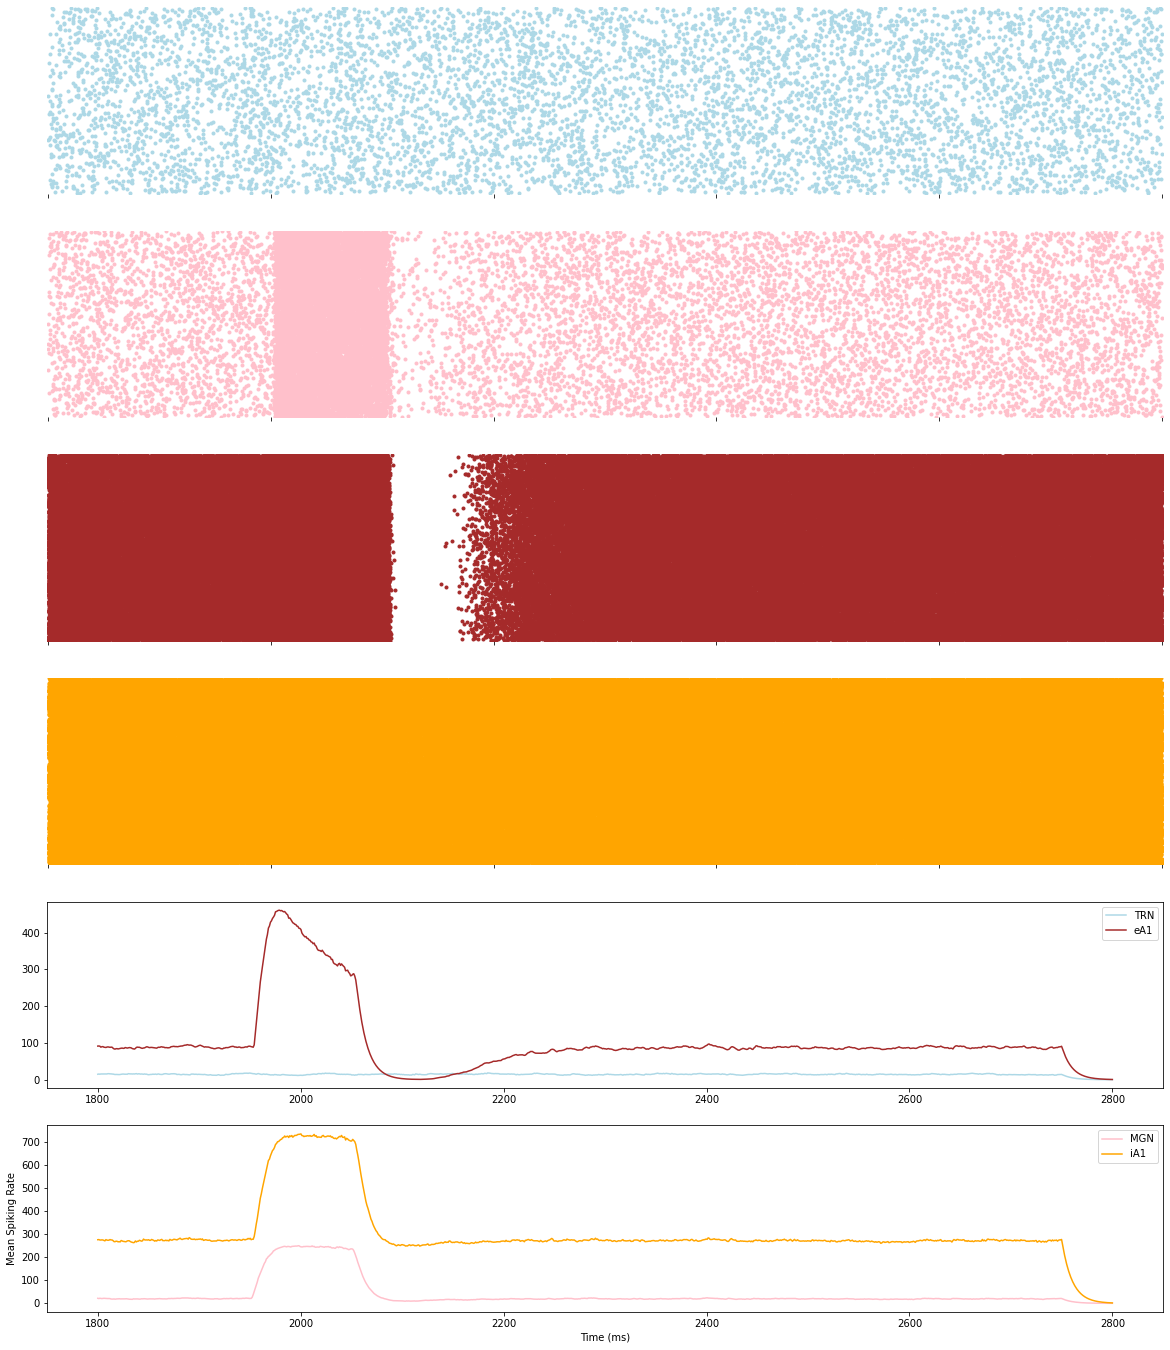

In [35]:
pth = "../demyelination/data/overhaul/activity/"
f = ['spk_overhaul_T=10.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800
    
p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='MGN', c='pink')

x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='eA1', c='brown')

x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()